# Twitch and Zoom stats

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # For plotting
import matplotlib.pyplot as plt

<mark>Jump right into analyses from here:</mark>

[Twitch durations and participants](#1)  
[Zoom Durations and participants](#2)  

## Twitch  
### Read in the csv

<font color=#330099>Read in the csv from the repo and set time as index</font>

> Should start from 10 AM sharp and maybe take couple of last values away

In [2]:
twitchDF_day1 = pd.read_csv("./data/Stream Session from 9_20_2022 to 9_20_2022.csv")
twitchDF_day2 = pd.read_csv("./data/Stream Session from 9_21_2022 to 9_21_2022.csv")
twitchDF_day3 = pd.read_csv("./data/Stream Session from 9_22_2022 to 9_22_2022.csv")
twitchDF_day4 = pd.read_csv("./data/Stream Session from 9_27_2022 to 9_27_2022.csv")
twitchDF_day5 = pd.read_csv("./data/Stream Session from 9_28_2022 to 9_28_2022.csv")
twitchDF_day6 = pd.read_csv("./data/Stream Session from 9_29_2022 to 9_29_2022.csv")

twitchDF_day1.set_index("Timestamp", inplace=True)
twitchDF_day2.set_index("Timestamp", inplace=True)
twitchDF_day3.set_index("Timestamp", inplace=True)
twitchDF_day4.set_index("Timestamp", inplace=True)
twitchDF_day5.set_index("Timestamp", inplace=True)
twitchDF_day6.set_index("Timestamp", inplace=True)

<font color=#330099>A closer look</font>

In [3]:
twitchDF_day1.head()

,Viewers,Live Views,New Followers,Chatters,Chat Messages,Ad Breaks,Subscriptions,Clips Created,All Clip Views
Timestamp,,,,,,,,,
9:35 AM,18.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9:40 AM,38.0,21.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
9:45 AM,56.2,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9:50 AM,81.8,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9:55 AM,99.8,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
twitchDF_day1.tail()

,Viewers,Live Views,New Followers,Chatters,Chat Messages,Ad Breaks,Subscriptions,Clips Created,All Clip Views
Timestamp,,,,,,,,,
1:20 PM,118.6,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1:25 PM,118.2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1:30 PM,115.2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1:35 PM,64.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1:40 PM,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
twitchDF_day1 = twitchDF_day1.loc['10:00 AM':'1:30 PM']
twitchDF_day2 = twitchDF_day2.loc['10:00 AM':'1:30 PM']
twitchDF_day3 = twitchDF_day3.loc['10:00 AM':'1:30 PM']
twitchDF_day4 = twitchDF_day4.loc['10:00 AM':'1:30 PM']
twitchDF_day5 = twitchDF_day5.loc['10:00 AM':'1:30 PM']
twitchDF_day6 = twitchDF_day6.loc['10:00 AM':'1:30 PM']

### Twitch durations and participants
<a id =1> </a>

In [6]:
DFs = [twitchDF_day1,twitchDF_day2,twitchDF_day3,twitchDF_day4,twitchDF_day5,twitchDF_day6]

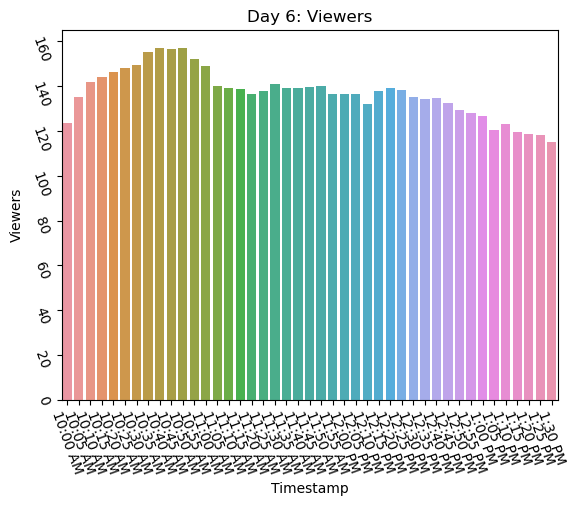

In [7]:
for i,df in enumerate(DFs, start=1):
    ax = sns.barplot(x=df.index, y=df.columns[0], data=df)
    ax.set(title="Day {}: {}".format(i,df.columns[0]))
    ax.set_xticklabels(df.index)
    ax.tick_params(labelrotation = 290)
    plt.savefig("./plots/Day_{}_{}.png".format(i,df.columns[0]))
#    plt.show()

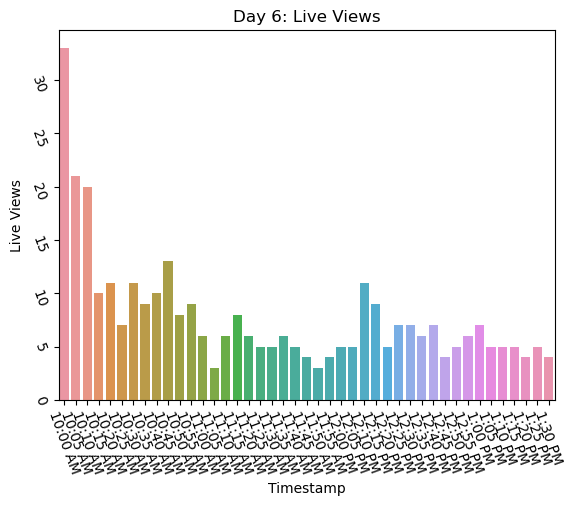

In [8]:
for i,df in enumerate(DFs, start=1):
    ax = sns.barplot(x=df.index, y=df.columns[1], data=df)
    ax.set(title="Day {}: {}".format(i,df.columns[1]))
    ax.set_xticklabels(df.index)
    ax.tick_params(labelrotation = 290)
    plt.savefig("./plots/Day_{}_{}.png".format(i,df.columns[1]))
#    plt.show()

In [9]:
# Collect min max etc to lists
Viewers_mean = []
Viewers_min = []
Viewers_max = []

In [10]:
for i,df in enumerate(DFs, start=1):
    print("Day {} viewers mean:".format(i), df.Viewers.mean())
    Viewers_mean.append(df.Viewers.mean().astype(int))
    print("Day {} viewers min:".format(i), df.Viewers.min())
    Viewers_min.append(df.Viewers.min().astype(int))
    print("Day {} viewers max:".format(i), df.Viewers.max())
    Viewers_max.append(df.Viewers.max().astype(int))
    print("Day {} new followers:".format(i), df["New Followers"].sum())
    print("Day {} chatters:".format(i), df["Chatters"].sum())
    print("Day {} subscriptions:".format(i), df["Subscriptions"].sum())
    print("------------------------------")

Day 1 viewers mean: 135.96744186046513
Day 1 viewers min: 115.2
Day 1 viewers max: 157.0
Day 1 new followers: 6.0
Day 1 chatters: 22.0
Day 1 subscriptions: 0.0
------------------------------
Day 2 viewers mean: 129.86511627906978
Day 2 viewers min: 84.2
Day 2 viewers max: 141.4
Day 2 new followers: 3.0
Day 2 chatters: 8.0
Day 2 subscriptions: 0.0
------------------------------
Day 3 viewers mean: 94.58604651162793
Day 3 viewers min: 78.0
Day 3 viewers max: 101.2
Day 3 new followers: 1.0
Day 3 chatters: 6.0
Day 3 subscriptions: 0.0
------------------------------
Day 4 viewers mean: 90.31627906976743
Day 4 viewers min: 74.8
Day 4 viewers max: 97.0
Day 4 new followers: 2.0
Day 4 chatters: 3.0
Day 4 subscriptions: 0.0
------------------------------
Day 5 viewers mean: 97.46976744186048
Day 5 viewers min: 80.2
Day 5 viewers max: 103.8
Day 5 new followers: 3.0
Day 5 chatters: 3.0
Day 5 subscriptions: 0.0
------------------------------
Day 6 viewers mean: 87.14418604651162
Day 6 viewers min: 

Viewers_mean = pd.Series(Viewers_mean)
Viewers_min = pd.Series(Viewers_min)
Viewers_max = pd.Series(Viewers_max)

## Zoom stats

### Read in the csv

<font color=#330099>Create indices = days</font>

In [11]:
days = ["Day{}".format(x) for x in range(1,7)]

In [12]:
days

['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6']

<font color=#330099>Read in the csv from the repo</font>

In [13]:
zoomDF = pd.read_csv("./data/CR_WS_Zoom_data.csv")

<font color=#330099>A closer look</font>

In [14]:
zoomDF

,Duration (Minutes),Participants
0,601,228
1,454,187
2,294,173
3,607,78
4,582,130
5,553,129


In [15]:
zoomDF.Participants = [59, 42, 46, 25, 32, 40]

<font color=#330099>Add days to the dataframe and make them row indices</font>

In [16]:
zoomDF['Day']=days

In [17]:
zoomDF.set_index('Day', inplace = True)

<font color=#330099>A closer look</font>

In [18]:
zoomDF

,Duration (Minutes),Participants
Day,,
Day1,601,59
Day2,454,42
Day3,294,46
Day4,607,25
Day5,582,32
Day6,553,40


### Zoom durations and participants
<a id =2> </a>

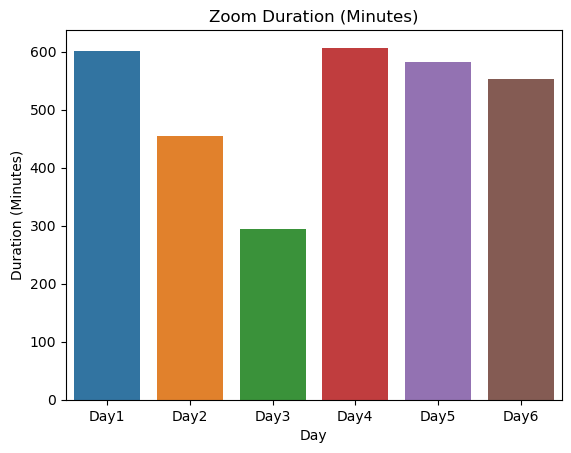

In [19]:
sns.barplot(x=zoomDF.index, y=zoomDF.columns[0], data=zoomDF).set(title="Zoom {}".format(zoomDF.columns[0]))
plt.savefig("./plots/Zoom_duration.png")

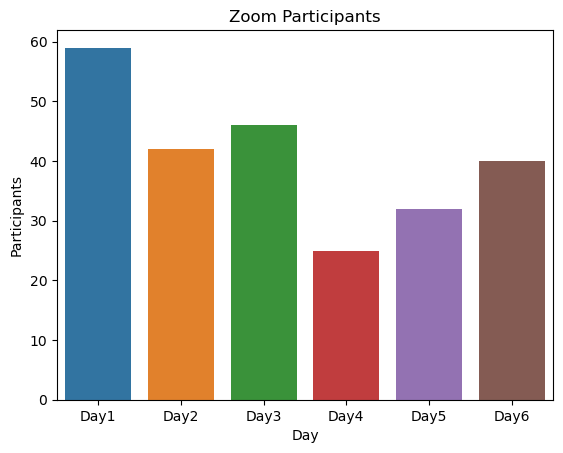

In [20]:
sns.barplot(x=zoomDF.index, y=zoomDF.columns[1], data=zoomDF).set(title="Zoom {}".format(zoomDF.columns[1]))
plt.savefig("./plots/Zoom_participants.png")

# One graph to rule them all

In [21]:
combined_cols = ["Zoom_participants", "Twitch_views_avg", "Twitch_views_min", "Twitch_views_max"]

In [22]:
#combined_DF = zoomDF.copy(deep = True)
combined_DF = zoomDF.drop("Duration (Minutes)",axis=1).copy(deep = True)

In [23]:
combined_DF["Twitch_views_mean"] = Viewers_mean
combined_DF["Twitch_views_min"] = Viewers_min
combined_DF["Twitch_views_max"] = Viewers_max

In [24]:
combined_DF.columns=combined_cols

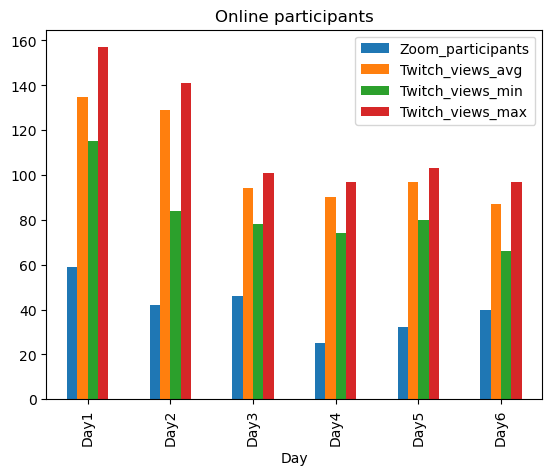

In [25]:
combined_DF.plot(kind="bar")
plt.title("Online participants")
plt.savefig("./plots/OnlineParticipants.png")